[View in Colaboratory](https://colab.research.google.com/github/sharponlooker/nBody/blob/master/Neptune_resonance_5_2.ipynb)

An N-body simulation setup resembling section 3 in Malhotra et al. (https://arxiv.org/abs/1804.01209) using the REBOUND integrator (https://github.com/hannorein/rebound)

<br>

Some useful links to REBOUND samples & documentation

[Test particles sample](http://rebound.readthedocs.io/en/latest/ipython/Testparticles.html)

[Orbital parameters](http://rebound.readthedocs.io/en/latest/python_api.html#rebound.Orbit)


In [12]:
# exclude this line on your local environment if you already have REBOUND installed
!pip install rebound


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import rebound


In [14]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Uranus")
sim.add("Neptune")

sim.move_to_com()
sim.integrator = "whfast"
sim.t = 0

sim.collision_resolve = "merge"

numberOfActiveParticles = 5 # sun & major planets

aNeptune = sim.particles[4].a


Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


Main configurable parameters can be specified here

In [0]:
numberOfTestParticles = 400

rayleighScale = 0.03

integrationTime = 1e5

sim.dt = 0.1

Particle setup according to paper's distributions: uniform for (a, e) in defined ranges, Rayleigh for *sin i*, uniform for orbital angles

In [0]:
a_initial = np.random.uniform(1.82 * aNeptune, 1.86 * aNeptune, numberOfTestParticles)
e_initial = np.random.uniform(0, 1, numberOfTestParticles)

i_initial = np.random.rayleigh(rayleighScale, numberOfTestParticles)
i_initial /= np.max(i_initial); i_initial *= (np.pi / 2) / i_initial.max()  # scale to 0-90 degrees

M_initial = np.random.uniform(-(np.pi), np.pi, numberOfTestParticles)
omega_initial = np.random.uniform(-(np.pi), np.pi, numberOfTestParticles)
Omega_initial = np.random.uniform(-(np.pi), np.pi, numberOfTestParticles)


for (a, e, i, M, omega, Omega) in zip(a_initial, e_initial, i_initial, M_initial, omega_initial, Omega_initial):
    sim.add(
        a = a,
        e = e,
        inc = i,
        M = M, # mean anomaly
        omega = omega, # argument of pericenter
        Omega = Omega # longitude of ascending node
    )
    
sim.N_active = numberOfActiveParticles

initialXs = np.array(list(map(lambda x: x.x, sim.particles[5:])))
initialYs = np.array(list(map(lambda x: x.y, sim.particles[5:])))
initialZs = np.array(list(map(lambda x: x.z, sim.particles[5:])))

A quick glance at the initial orbital parameter distributions to verify they are properly setup

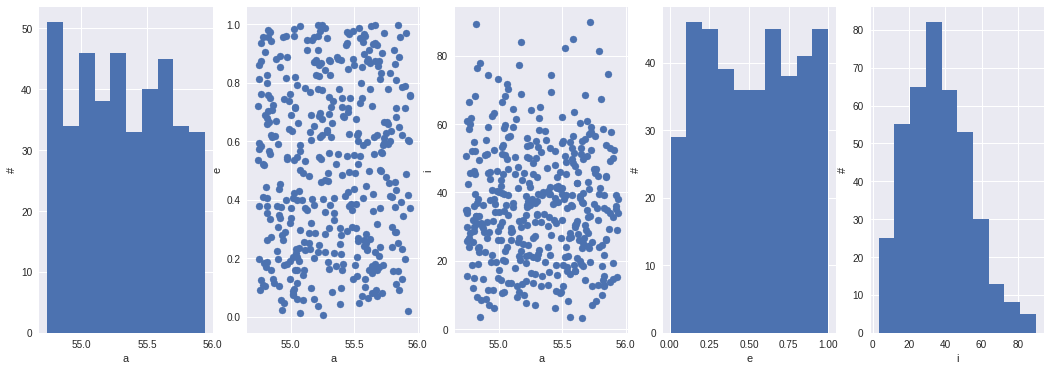

In [17]:
plt.figure(figsize=(18, 6))
plt.tight_layout()

plt.subplot(1, 5, 1); plt.xlabel("a"); plt.ylabel("#")
plt.hist(a_initial);

plt.subplot(1, 5, 2); plt.xlabel("a"); plt.ylabel("e")
plt.scatter(a_initial, e_initial);

plt.subplot(1, 5, 4); plt.xlabel("e"); plt.ylabel("#")
plt.hist(e_initial);

plt.subplot(1, 5, 3); plt.xlabel("a"); plt.ylabel("i")
plt.scatter(a_initial, list(map(lambda x: math.degrees(x), i_initial)));

plt.subplot(1, 5, 5); plt.xlabel("i"); plt.ylabel("#")
plt.hist(list(map(lambda x: math.degrees(x), i_initial)));


Now let the simulation run, this will take time, you may want to grab a coffee or something. Note: currently ignoring intermediate results, only looking at the final state of the simulation

In [0]:
outputPoints = int(integrationTime / 1000)

times = np.linspace(0., integrationTime, outputPoints)

for i, time in enumerate(times):
    sim.integrate(time)


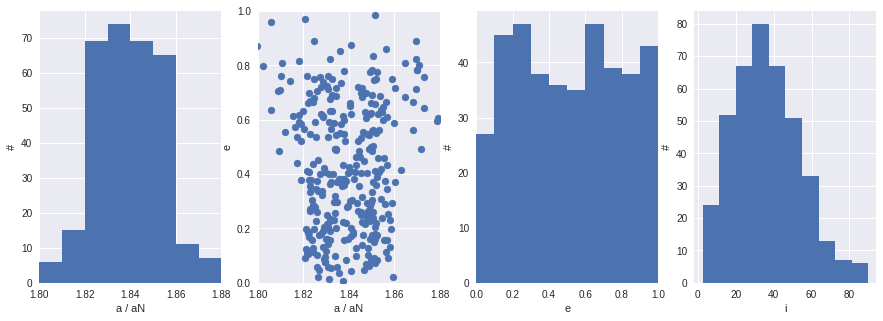

In [19]:
a_final = np.array(list(map(lambda x: x.a / aNeptune, sim.particles[5:])))
e_final = np.array(list(map(lambda x: x.e, sim.particles[5:])))
i_final = np.array(list(map(lambda x: math.degrees(x.inc), sim.particles[5:])))

plt.figure(figsize=(15, 5))
plt.tight_layout()

plt.subplot(1, 4, 1); plt.xlabel("a / aN"); plt.ylabel("#")
plt.hist(a_final, bins=np.arange(1.80, 1.89, 0.01));
plt.xlim(1.80, 1.88);

plt.subplot(1, 4, 2); plt.xlabel("a / aN"); plt.ylabel("e")
plt.scatter(a_final, e_final);
plt.xlim(1.80, 1.88)
plt.ylim(0, 1)

plt.subplot(1, 4, 3); plt.xlabel("e"); plt.ylabel("#")
plt.hist(e_final, bins=np.arange(0, 1.1, 0.1));
plt.xlim(0, 1)

plt.subplot(1, 4, 4); plt.xlabel("i"); plt.ylabel("#")
plt.hist(i_final);


Snapshots of the system before and after the simulation (top view and edge view)

In [0]:
def orbitMap(xs, ys, zs):
  a = 100 # AU
  
  plt.figure(figsize=(15, 7))
  plt.tight_layout()

  plt.subplot(1, 2, 1); plt.xlabel("x"); plt.ylabel("y")
  plt.scatter(xs, ys);
  plt.xlim(-a, a)
  plt.ylim(-a, a)

  plt.subplot(1, 2, 2); plt.xlabel("x"); plt.ylabel("z")
  plt.scatter(xs, zs);
  plt.xlim(-a, a)
  plt.ylim(-a, a);

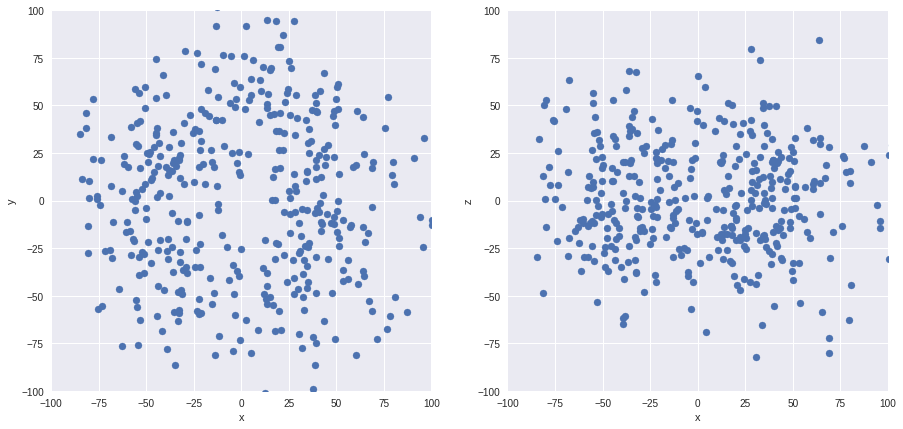

In [21]:
orbitMap(initialXs, initialYs, initialZs)

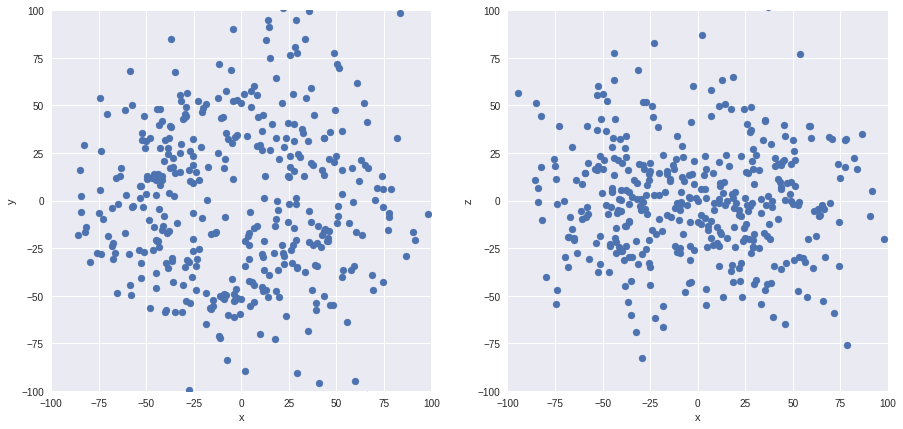

In [22]:
xs = np.array(list(map(lambda x: x.x, sim.particles[5:])))
ys = np.array(list(map(lambda x: x.y, sim.particles[5:])))
zs = np.array(list(map(lambda x: x.z, sim.particles[5:])))

orbitMap(xs, ys, zs)


In [0]:
#rebound.OrbitPlot(sim, lim=70, slices=True, unitlabel="[AU]", color=False, periastron=False);
